## **Логистическая регрессия**
 Логистическая регрессия — линейный бинарный классификатор, основанный на применении сигмоидальной функции к линейной комбинации признаков, результатом которого является вероятность принадлежности к определённому классу. Обычно порог устанавливается 0.5: если вероятность меньше порога — класс относится к 0, а если больше — к 1. В принципе, условия определения логистической регрессии такие же как и у линейной за исключением бинаризации таргета.

Поскольку прогноз в линейной регрессии может принимать значения в любом диапазоне, а нам нужны вероятности принадлежности к классу в диапазоне [0; 1], то прогноз линейной регрессии можно представить в виде логарифма шансов (шанс — это отношение вероятности выполнения события к его невыполнению) и уже из него выразить вероятность принадлежности к классу. Полученная функция называется сигмоидальной.

$\ln(\frac{p_+}{1 - p_+}) = w \cdot x + b$

$\frac{p_+}{1 - p_+} = e^{w \cdot x + b} \ \ \Rightarrow \ \ p_+ = \frac{1}{1 + e^{-(w \cdot x + b)}} = \sigma(w \cdot x + b)$

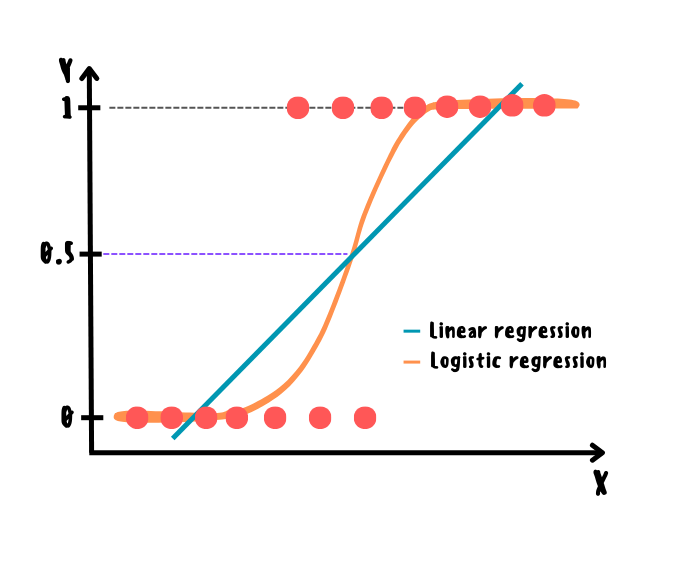

### **Функция потерь и метод максимального правдоподобия**
Выбор линии (плоскости) для разделения классов наилучшим образом заключается в минимизации усреднённой логистической функции потерь, основанной на оптимизации *метода максимального правдоподобия*. Суть данного метода заключается в поиске параметров модели, которые будут соответствовать наблюдениям с максимальной вероятностью, а его оптимизация заключается в логарифме правдоподобия вместо правдоподобия из-за вычислительной эффективности и более стабильных результатов. Проще говоря, функция потерь просто является средними потерями на всём обучающем наборе.

Поскольку в данном случае отсутствует решение в аналитическом виде, а функция потерь является гладкой и выпуклой, то обучение логистической регрессии происходит также на основе градиентного спуска как и в случае линейной регрессии.



### **Вывод уравнения логистической регрессии и градиента её функции потерь**

$$
L(\sigma(z), y_i) = 
\begin{cases}
  - \ln\sigma(z) & \text{if } y_i=1 \\
  - \ln(1 - \sigma(z)) & \text{if } y_i=0
\end{cases}
$$
- initial form of the logistic loss

$L(\sigma(z), y_i) = \prod\limits_{i=1}^{n} σ(z)^{y_i} (1 - \sigma(z))^{(1-y_i)}
\ \ - \ $ maximum likelihood method

$L_{log}(\sigma(z), y_i) = -[y_i\ln\sigma(z) + (1 - y_i)\ln(1 - \sigma(z))]\ \ - \ $ logistic loss with likelihood logarithm

$J(w, b) = \frac{1}{n} \sum\limits_{i = 1}^{n}
L_{log}(\sigma(z), y_i)\ \ - \ $ cost function for all training samples

**Gradients of cost function for bias and weights respectively**

$\frac{\partial J(w, b)}{\partial b} =
(\frac{1}{n} \sum\limits_{i = 1}^{n} L_{log}(\sigma(z), y_i))' =
 \frac{1}{n} \sum\limits_{i = 1}^{n} \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{b}} = \frac{1}{n} \sum\limits_{i = 1}^{n} (\sigma(z) - y_i)$

$\frac{\partial J(w, b)}{\partial \omega} =
(\frac{1}{n} \sum\limits_{i = 1}^{n} L_{log}(\sigma(z), y_i))' =
 \frac{1}{n} \sum\limits_{i = 1}^{n} \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\omega}} = \frac{1}{n} \sum\limits_{i = 1}^{n} (\sigma(z) - y_i)x_i$

**Partial derivatives of logistic loss for bias and weights respectively**

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{b}} =
 \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\sigma(z)}} \cdot
 \frac{\partial{\sigma(z)}}{\partial{z}} \cdot \frac{\partial{z}}{\partial{b}}$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\omega}} =
 \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\sigma(z)}} \cdot
 \frac{\partial{\sigma(z)}}{\partial{z}} \cdot \frac{\partial{z}}{\partial{\omega}}$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\sigma(z)}} =
-[y_i(\ln\sigma(z))' + (1 - y_i)(\ln(1 - \sigma(z)))'] =
-[y_i \cdot \frac{1}{\sigma(z)} + (1 - y_i) \cdot
\frac{1}{1-\sigma(z)} \cdot (-1)] = \\
= \frac{1 - y_i}{1 - \sigma(z)} - \frac{y_i}{\sigma(z)} =
\frac{\sigma(z) - \sigma(z) y_i - y_i + \sigma(z) y_i}{\sigma(z)
(1 - \sigma(z)} = \frac{\sigma(z) - y_i}{\sigma(z)(1 - \sigma(z))}$

$\frac{\partial{\sigma(z)}}{\partial{z}} = ((1 + e^{-z})^{-1})' =
\frac{-1}{(1 + e^{-z})^{-2}} \cdot e^{-z} \cdot (-1) =
\frac{e^{-z}}{(1 + e^{-z})^{-2}} = |e^{-z} = \frac{1}{\sigma(z)} - 1 =
\frac{1-\sigma(z)}{\sigma(z)}| =
\frac{1 - \sigma(z)}{\sigma(z)(1 + \frac{1 - \sigma(z)}{\sigma(z)})^{2}}
= \sigma(z)(1 - \sigma(z))$


$\frac{\partial z}{\partial b} = (w \cdot x_i)' + b' = 0 + 1 = 1$

$\frac{\partial z}{\partial \omega} = w' \cdot x_i + w \cdot x_i' + b' = x_i + 0 + 0 = x_i$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{b}} =
 \frac{\sigma(z) - y_i}{\sigma(z)(1 - \sigma(z))} \cdot
 \sigma(z)(1 - \sigma(z)) = \sigma(z) - y_i$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\omega}} =
 \frac{\sigma(z) - y_i}{\sigma(z)(1 - \sigma(z))} \cdot
 \sigma(z)(1 - \sigma(z)) \cdot x_i = (\sigma(z) - y_i)x_i$

**Where**:

$\sigma(z) = \frac{1}{1 + e^{-z}}\ \ - \ $ sigmoid function;

$z_{w, b}(x_i) = w \cdot x_i + b\ \ - \ $ linear function;

$b \ \ - \ $ bias;

$w \ \ - \ $ weights vector;

$x_i \ \ - \ $ features vector of i-th sample.

### **Принцип работы логистической регрессии**

Как можно было догадаться, обучение логистической регрессии происходит идентично линейной за исключением пропуска линейных прогнозов через сигмоидальную функцию на каждой итерации. С помощью полученных весов сначала выполняется линейный прогноз, а затем итоговый через сигмоидальную функцию: полученные вероятности округляются согласно заданному порогу (обычно 0.5).

Стоит также отметить, что для логистической регрессии характерны такие же особенности в плане оптимизации и регуляризации, как и для линейной.

## **Softmax-regression**
Логистическую регрессию можно также обобщить для многоклассовой классификации. Для этого существуют 2 стратегии:
- **one vs rest**, когда обучается модель для каждого уникального класса в таргете на основе бинаризации и в качестве итогового прогноза выбирается класс с максимальной вероятностью;
- **softmax**, когда одна модель поддерживает много классов напрямую, что мы сейчас и рассмотрим более подробно.

Идея softmax-регрессии заключается в следующем: сначала производится бинаризация таргета с помощью one-hot и для признаков строится таблица весов количестве, пропорциональному числу уникальных значений в таргете. Далее вычисляется линейный прогноз с учётом весов для каждого класса, после чего полученные результаты оцениваются как вероятность класса от 0 до 1 с помощью функции softmax, которая также ещё называется нормализованной экспоненциальной.

В данном случае в качестве функции потерь будет выступать перекрёстная энтропия (cross-entropy) поскольку она штрафует модель в случае низкой оценки вероятности для целевого класса. Другими словами, кросс-энтропия используется для оценки качества соответствия набора оценочных вероятностей классов целевым классам. Итоговым прогнозом на тестовой выборке будет класс с максимальной вероятностью.

**Формулы для расчётов**

$z_k (x^{(i)}) = w_k \cdot x^{(i)} + b_k\ - \ $ linear prediction for class k

$p_k = \frac{e^{z_k (x^{(i)})}}{\sum \limits_{j=1}^{K} e^{z_j (x^{(i)})}} \ - \ $ softmax function

$J(\Theta) = - \frac{1}{n} \sum \limits_{i=1}^{n} \sum \limits_{k=1}^{K} y_k^{(i)}
log(\hat p_k^{(i)}) \ - \ $ cost funtcion

$\frac{\partial J(\Theta)}{\partial b_k} = \frac{1}{n} \sum \limits_{i=1}^{n} (\hat p_k^{(i)} - y_k^{(i)}) \ - \ $ bias gradient for class k

$\frac{\partial J(\Theta)}{\partial w_k} = \frac{1}{n} \sum \limits_{i=1}^{n} (\hat p_k^{(i)} - y_k^{(i)}) x^{(i)} \ - \ $ weights vector-gradient for class k

K - number of classes

$\Theta \ - \ $ parameters matrix

Как можно заметить, по сути, softmax представляет собой более быструю оптимизацию one vs rest, позволяющую избежать обучение лишних моделей, что будет особенно полезно при работе с большими датасетами. Ещё одно интересное наблюдение заключается в том, что при наличии только двух классов в таргете (k=2) функция потерь будет эквивалентна log loss в логистической регрессии для бинарного случая.



### **Реализация на Python с нуля**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
class GDLogisticRegression:
    def __init__(self, learning_rate=0.1, tolerance=0.0001, max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * X.T @ (y_pred_sigmoid - y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
        classes = np.array([0 if pred < 0.5 else 1 for pred in y_pred_sigmoid])

        return classes

In [3]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, tolerance=0.0001, max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def _softmax(self, predictions):
        exp = np.exp(predictions)

        return exp / np.sum(exp, axis=1, keepdims=True)

    def fit(self, X, y):
        n_classes = len(np.unique(y))
        n_samples, n_features = X.shape
        one_hot_y = pd.get_dummies(y).to_numpy()

        self.bias = np.zeros(n_classes)
        self.weights = np.zeros((n_features, n_classes))
        previous_db = np.zeros(n_classes)
        previous_dw = np.zeros((n_features, n_classes))

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_softmax = self._softmax(y_pred_linear)
            db = 1 / n_samples * np.sum(y_pred_softmax - one_hot_y, axis=0)   # sum by columns
            dw = 1 / n_samples * X.T @ (y_pred_softmax - one_hot_y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction.all() < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_softmax = self._softmax(y_pred_linear)
        most_prob_classes = np.argmax(y_pred_softmax, axis=1)

        return most_prob_classes

In [4]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train.values[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train.values)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Загрузка датасетов**
Для обучения логистической регрессии будет использован [Heart Attack dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset), где необходимо спрогнозировать возникновение либо отсутствие сердечного приступа у пациентов, исходя из их показателей в анализах.

В случае softmax-регрессии используется [Credit Score Classification Dataset](https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset/data) для прогноза кредитного рейтинга людей на основе их возраста, дохода и так далее.

In [ ]:
df_path = "/content/drive/MyDrive/heart_attack.csv"
heart_attack = pd.read_csv(df_path)
print(heart_attack.head())

X1, y1 = heart_attack.iloc[:, :-1], heart_attack.iloc[:, -1]
X1_scaled = StandardScaler().fit_transform(X1)
y1 = pd.Series(LabelEncoder().fit_transform(y1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)
X1_train_s, X1_test_s, y1_train, y1_test = train_test_split(X1_scaled, y1, random_state=0)

In [ ]:
df_path = "/content/drive/MyDrive/credit_score.csv"
credit_score = pd.read_csv(df_path)
print(credit_score.head())

X2, y2 = credit_score.iloc[:, :-1], credit_score.iloc[:, -1]
cat_features_list = X2.select_dtypes(include=['object']).columns
X2[cat_features_list] = X2[cat_features_list].apply(LabelEncoder().fit_transform)
X2_scaled = StandardScaler().fit_transform(X2)
y2 = pd.Series(LabelEncoder().fit_transform(y2))

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
X2_train_s, X2_test_s, y2_train, y2_test = train_test_split(X2_scaled, y2, random_state=0)

### **Обучение моделей и оценка полученных результатов**
Логистическая регрессия показала довольно хороший результат, но не самый лучший. В первую очередь, это связано с некоторым шумом в данных и поскольку это всё же линейный классификатор, то можно сделать вывод, что он лучше всего работает с данными, где прослеживается ярко выраженное линейное разделение, что хорошо заметно на данных для случая с softmax-регрессией.



**Logistic regression**

In [ ]:
logistic_regression = GDLogisticRegression()
logistic_regression.fit(X1_train_s, y1_train)
pred_res = logistic_regression.predict(X1_test_s)
accuracy = accuracy_score(y1_test, pred_res)

print(f'Logistic regression accuracy: {accuracy}')
print(f'prediction: {pred_res}')

**Logistic regression (scikit-learn)**

In [ ]:
sk_logistic_regression = LogisticRegression(penalty=None, max_iter=1000, multi_class='ovr')
sk_logistic_regression.fit(X1_train, y1_train)
sk_pred_res = sk_logistic_regression.predict(X1_test)
sk_accuracy = accuracy_score(y1_test, sk_pred_res)

print(f'sk Logistic regression accuracy: {sk_accuracy}')
print(f'prediction: {sk_pred_res}')

feature_indexes = [3, 9]
title1 = 'LogisticRegression surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_logistic_regression, feature_indexes, title1)

**Softmax-regression**

In [ ]:
softmax_regression = SoftmaxRegression()
softmax_regression.fit(X2_train_s, y2_train)
softmax_pred_res = softmax_regression.predict(X2_test_s)
softmax_accuracy = accuracy_score(y2_test, softmax_pred_res)

print(f'Softmax-regression accuracy: {softmax_accuracy}')
print(f'Softmax prediction: {softmax_pred_res}')

**Softmax-regression (scikit-learn)**

In [ ]:
sk_softmax_regression = LogisticRegression(penalty=None, max_iter=1000, multi_class='multinomial')
sk_softmax_regression.fit(X2_train, y2_train)
sk_softmax_pred_res = sk_softmax_regression.predict(X2_test)
sk_softmax_accuracy = accuracy_score(y2_test, sk_softmax_pred_res)

print(f'sk Softmax-regression accuracy: {sk_softmax_accuracy}')
print(f'sk Softmax prediction: {sk_softmax_pred_res}')

### **Преимущества и недостатки логистической регрессии**
Преимущества:
- простота в реализации и интерпретации;
- высокая скорость работы;
- относительно хорошая точность в случае с линейной зависимостью в данных.

Недостатки:
- низкая гибкость и адаптивность из-за предположения о линейности данных;
- низкая точность в случае с данными сложной формы, что следует из предыдущего пункта;
- чувствительность к шуму и выбросам.

Стоит отметить, что, как и в случае с линейной регрессией, перечисленные недостатки касаются реализации в чистом виде и могут быть частично либо полностью устранены с помощью методов регуляризации или добавления полиномиальных признаков. Однако на сегодняшний день существуют другие алгоритмы, которые значительно превосходят логистическую регрессию в плане точности и стабильности.

### **Дополнительные источники**
Документация:
- [описание логистической регрессии](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression);
- [логистическая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Видео:

[Лекция](https://www.youtube.com/watch?v=19a_MTJX14g).

[Плейлист](https://www.youtube.com/playlist?list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe).

[One vs rest](https://www.youtube.com/watch?v=V8fS0T_ktn4).

Softmax-регрессия: [один](https://www.youtube.com/watch?v=M59JElEPgIg), [два](https://www.youtube.com/watch?v=LLux1SW--oM).
